<a href="https://colab.research.google.com/github/aslidagar/TechnoHacks-Intern-/blob/main/Data_Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name : Lakshay Dagar
Task - 3

Data Visualization using Histogram

# Imprting Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from  scipy import stats
import seaborn as sns
import numpy as np

Importing the Dataset

In [4]:
df=pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#Getting the information about all columns in the DataFrame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#Checking for missing values in each column of the DataFrame.

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing values in the dataframe.

#Checking for Outliers in the Columns Of DataFrame.

<Axes: xlabel='SepalLengthCm'>

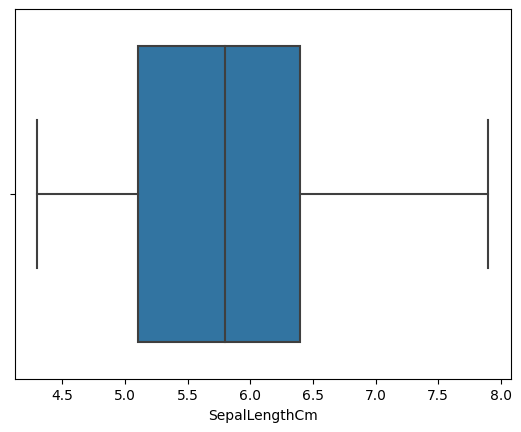

In [12]:
#Checking Of Outliers in the"SepalLengthCm" Column Of DataFrame.
sns.boxplot(x=df["SepalLengthCm"],showfliers=True)

<Axes: xlabel='SepalWidthCm'>

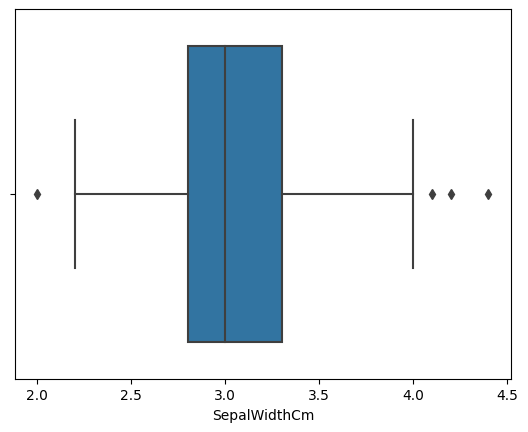

In [13]:
#Checking Of Outliers in the"SepalWidthCm" Column Of DataFrame.
sns.boxplot(x=df["SepalWidthCm"],showfliers=True)

<Axes: xlabel='PetalWidthCm'>

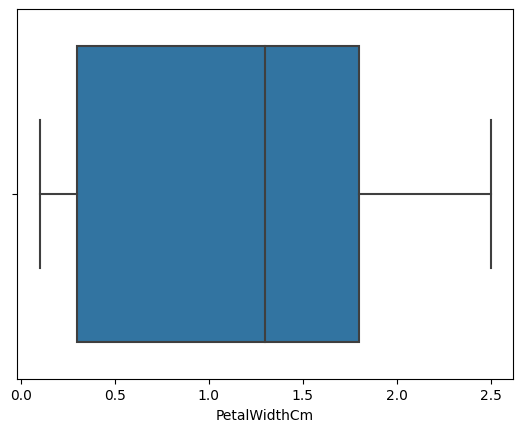

In [14]:
#Checking Of Outliers in the"PetalWidthCm" Column Of DataFrame.
sns.boxplot(x=df["PetalWidthCm"],showfliers=True)

<Axes: xlabel='PetalLengthCm'>

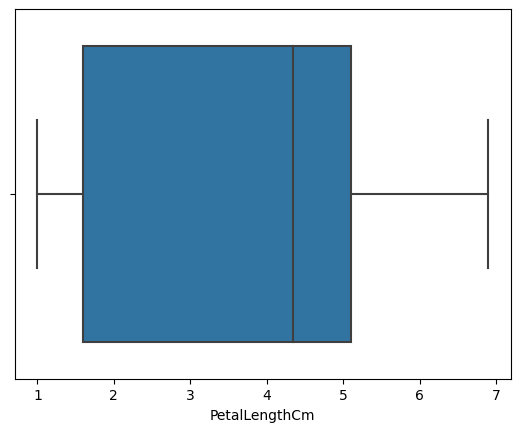

In [15]:
#Checking Of Outliers in the"PetalLengththCm" Column Of DataFrame.
sns.boxplot(x=df["PetalLengthCm"],showfliers=True)

In [21]:
#Removing outlier present in the "SepallWidthCm" column of DataFrame.
def remove_outliers_IQR(df, SepalWidthCm, threshold=1.5):
    q1 = df["SepalWidthCm"].quantile(0.25)
    q3 = df["SepalWidthCm"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[(df["SepalWidthCm"] >= lower_bound) & (df["SepalWidthCm"] <= upper_bound)]

In [22]:
columns_to_check=["SepalWidthCm"]
for col in columns_to_check:
    df =remove_outliers_IQR(df, col)

<Axes: xlabel='SepalWidthCm'>

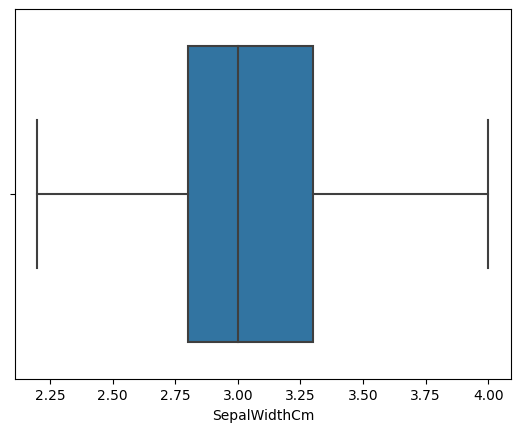

In [23]:
sns.boxplot(x=df["SepalWidthCm"],showfliers=True)

#Data Visualisations

Plotting The Count Of Species Using Bar Chart

<Axes: xlabel='Species', ylabel='count'>

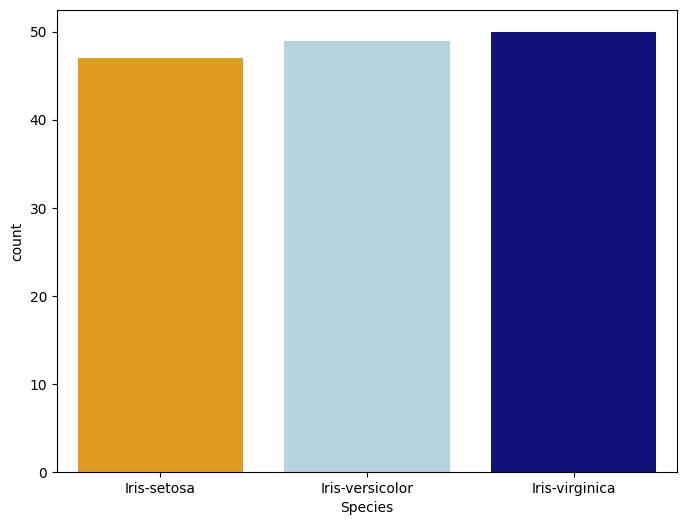

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='Species',data=df, palette=['orange', 'lightblue', 'darkblue'])

#Creating a Histogram for the column SepalLengthCm

<Axes: >

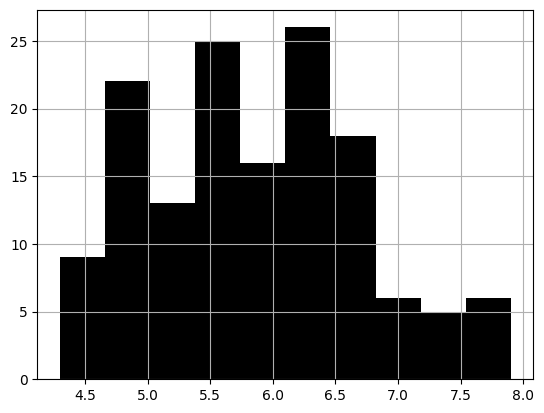

In [25]:
df['SepalLengthCm'].hist(color='black')

#Creating a Histogram for the column SepalWidthCm

<Axes: >

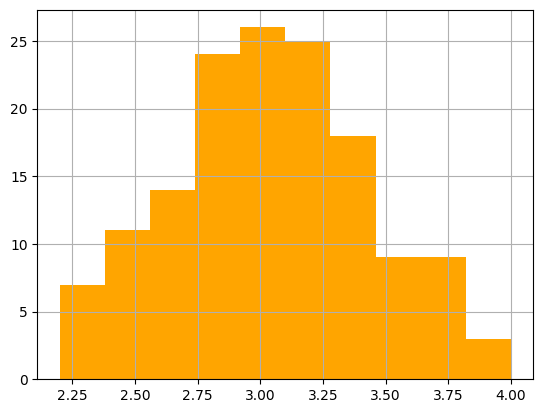

In [26]:
df['SepalWidthCm'].hist(color='orange')

#Creating a Histogram for the column PetalWidthCm

<Axes: >

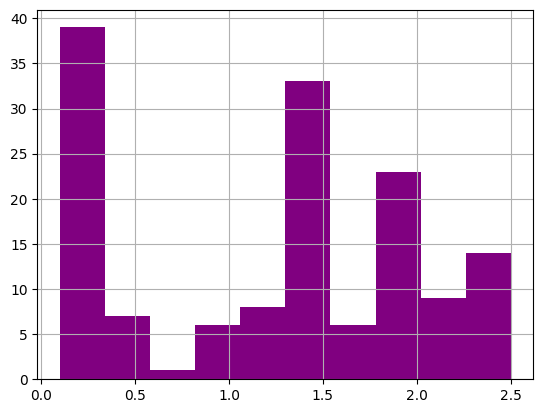

In [27]:
df['PetalWidthCm'].hist(color='Purple')

#Creating a Histogram for the column PetalLengthCm

<Axes: >

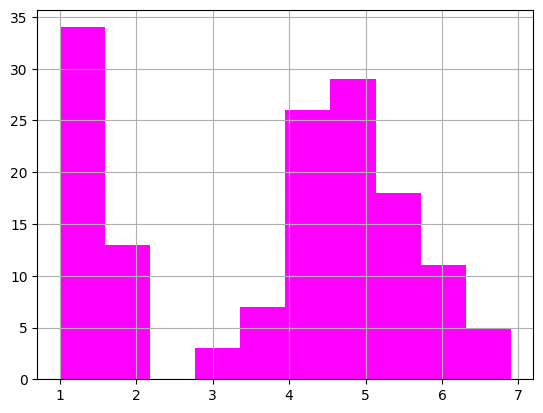

In [31]:
df['PetalLengthCm'].hist(color='Magenta')

#Creating a bar chart of the mean of each column in the DataFrame, grouped by the Species column
Creating a box plot to show relationship between Species and SepalLengthCm

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

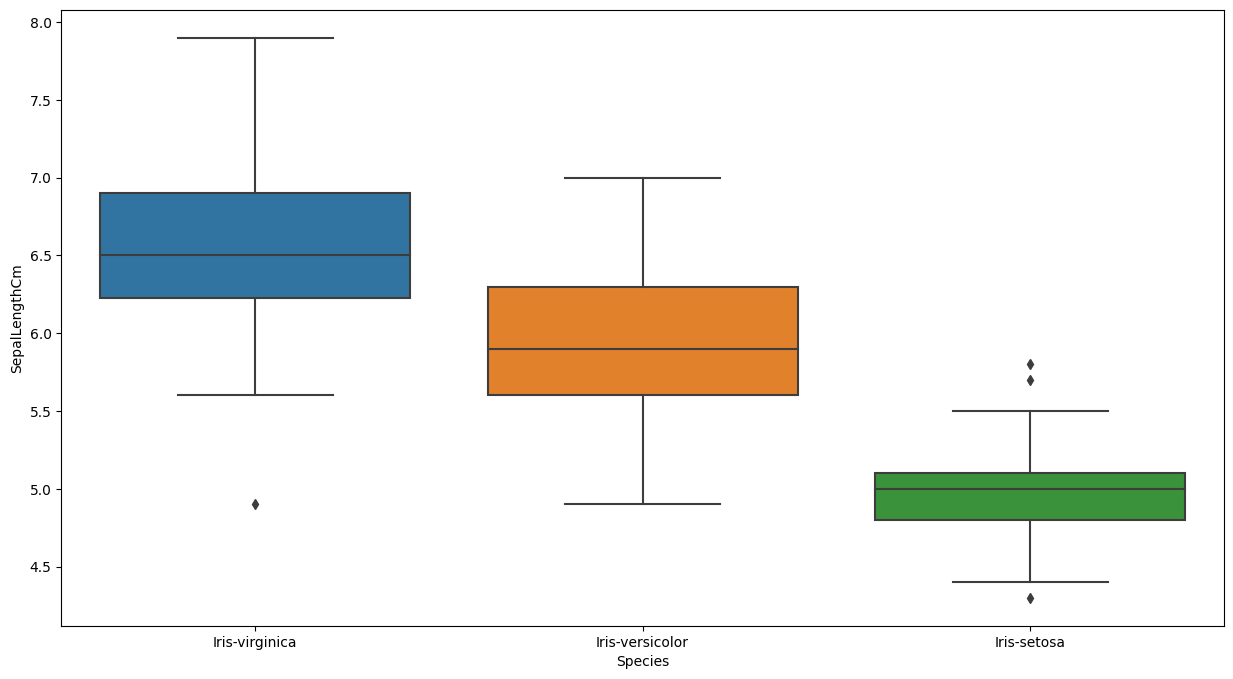

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

#Creating a box plot to show relationship between Species and SepalWidthCm

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

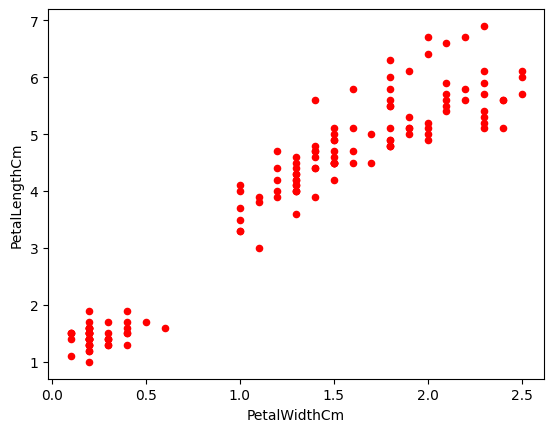

In [34]:
#Creating a scatter plot to show relationship between PetalWidthCm and PetalLengthCm
df.plot(kind='scatter', x='PetalWidthCm', y='PetalLengthCm', color='red')

#Creating a bar chart of the mean of each column in the DataFrame, grouped by the Species column

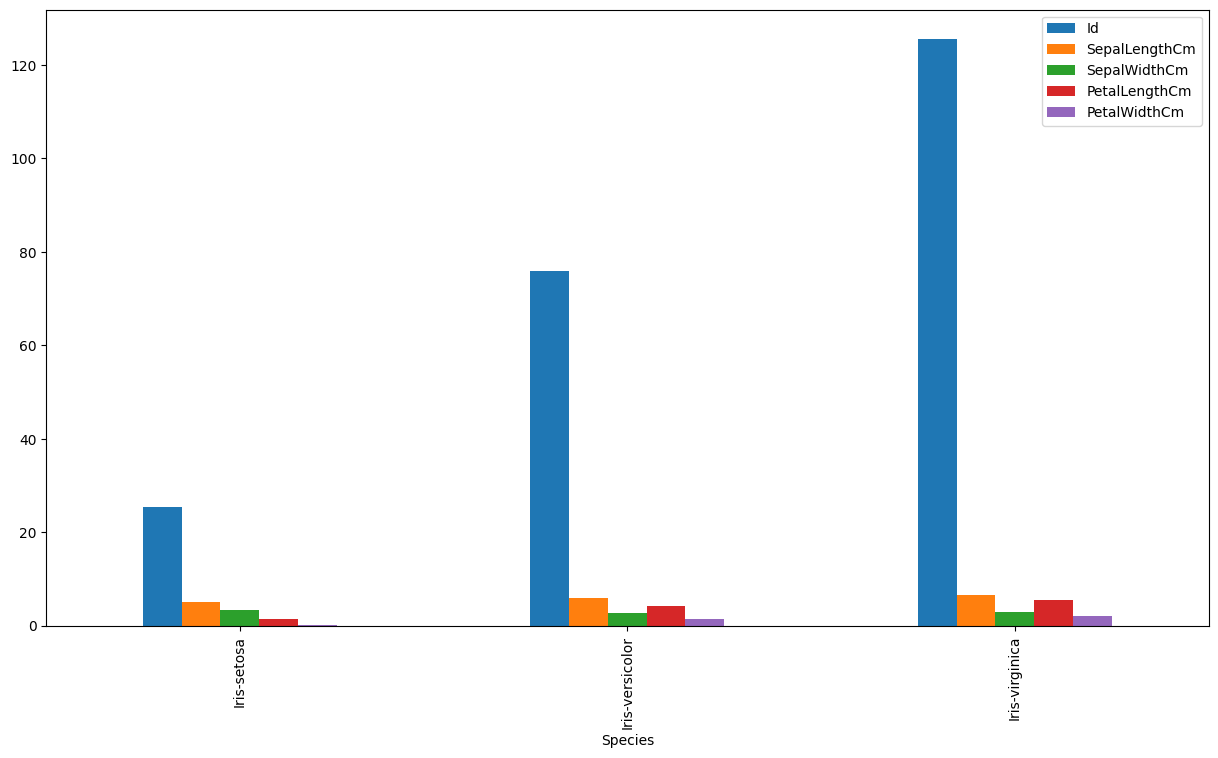

In [35]:
df.groupby('Species').mean().plot(kind="bar", figsize=(15, 8))
plt.show()

#Creating Pair Plot to show the relationship between variables in DataFrame.

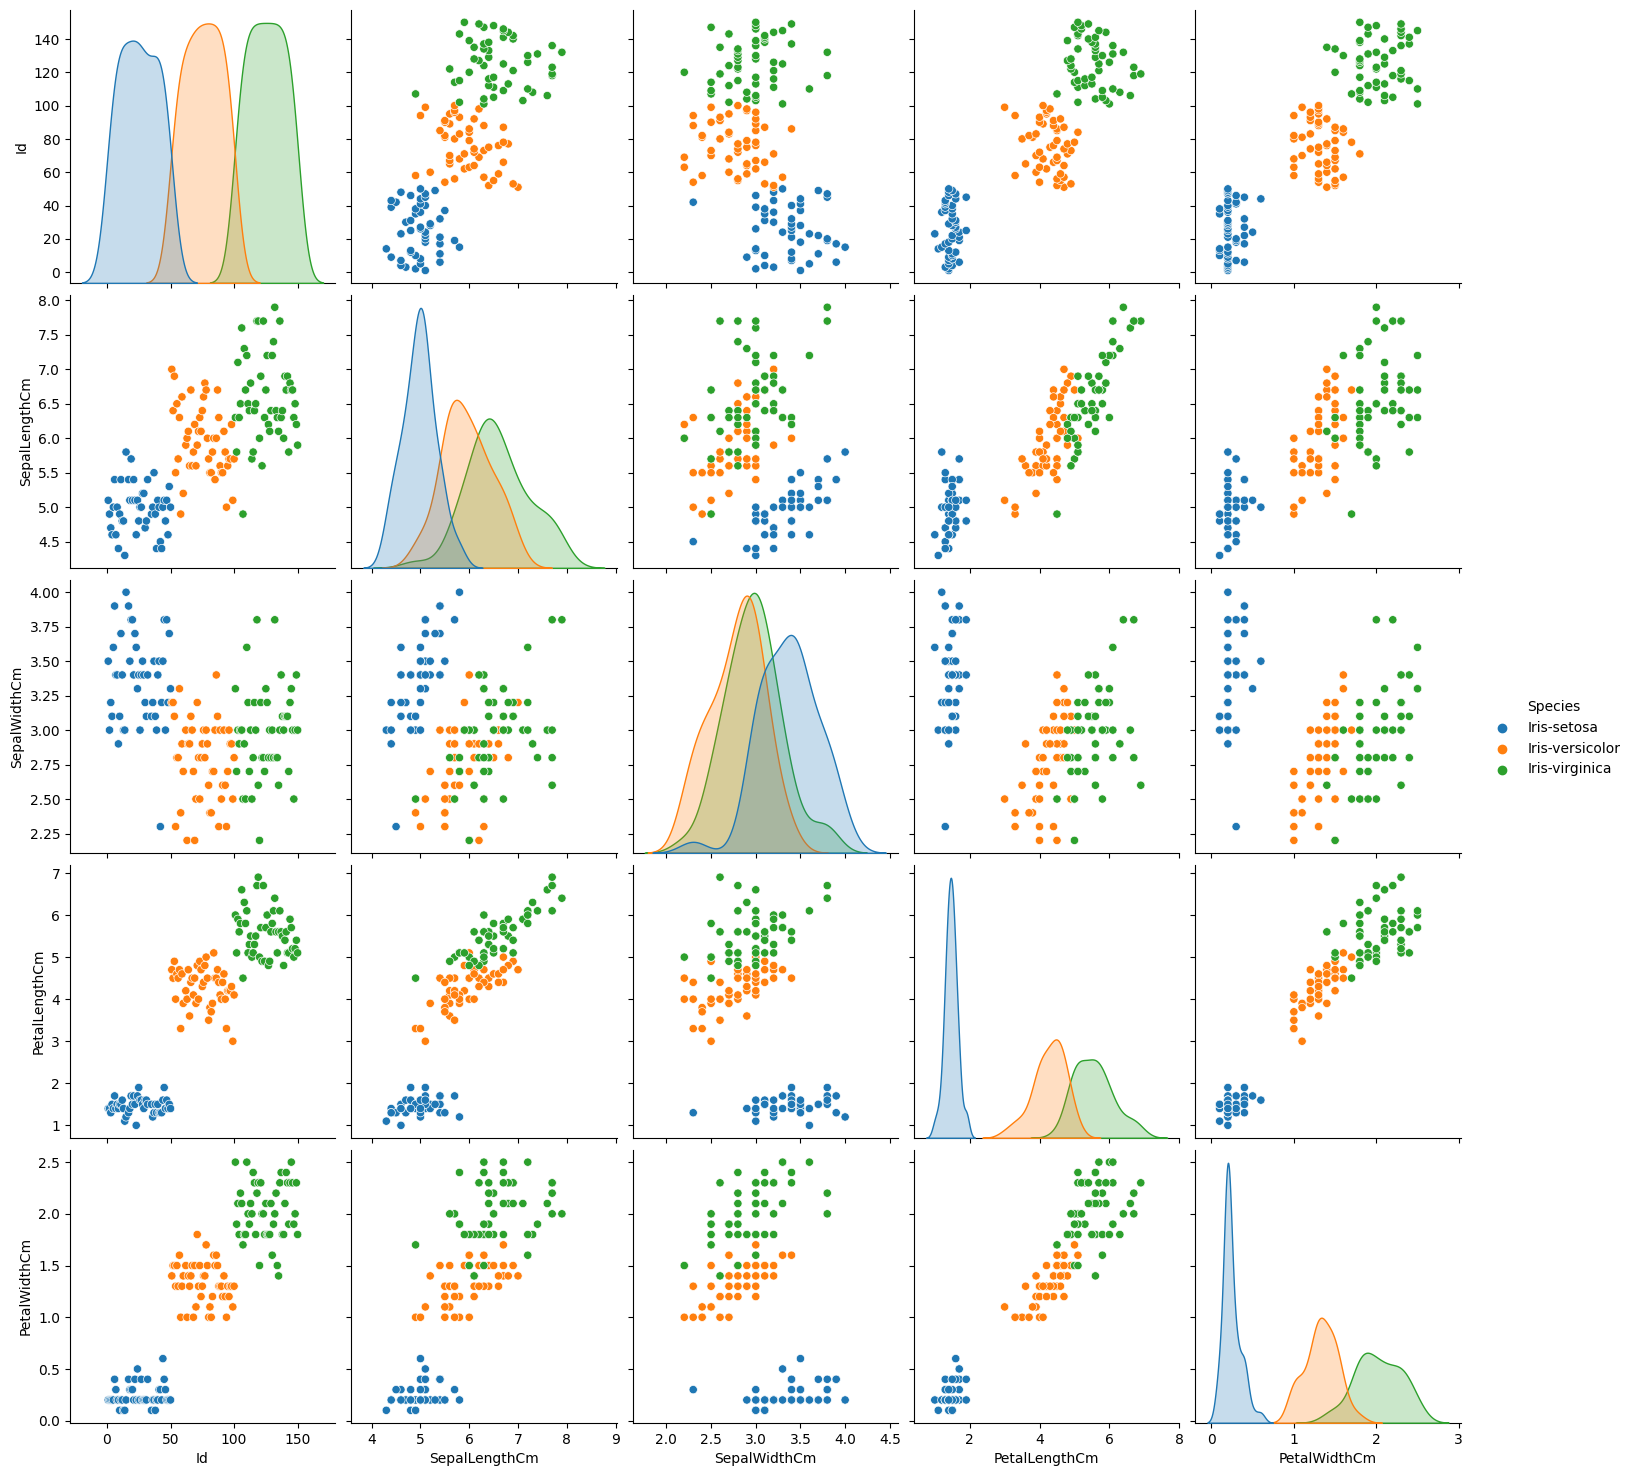

In [36]:
sns.pairplot(df,hue='Species',height=3)

#Creating correlation matrix, which shows the correlation between each pair of columns in the DataFrame

In [37]:
df.corr(numeric_only=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.718722,-0.384320,0.880016,0.898193
SepalLengthCm,0.718722,1.000000,-0.113977,0.879374,0.822577
SepalWidthCm,-0.384320,-0.113977,1.000000,-0.397123,-0.329782
PetalLengthCm,0.880016,0.879374,-0.397123,1.000000,0.961755
PetalWidthCm,0.898193,0.822577,-0.329782,0.961755,1.000000


#Displaying the correlation using Heatmap

<Axes: >

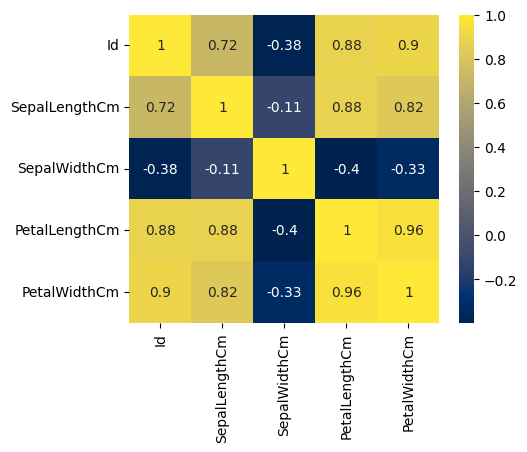

In [38]:
corr=df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='cividis')